<a href="https://colab.research.google.com/github/HamzaAhmed78629/Python-Coding-Projects/blob/main/WorkshopPoject_Part2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks & Neurodynamics**

Write a program for an ANN for an AND gate using the activation function:

$$\sigma(v)=\frac{1}{1+e^{-v}}.$$

In [ ]:
# Artificial Neural Network (ANN) for an AND Logic Gate
# This ANN gives a very good approximation
import numpy as np
w1 , w2 , b = 20 , 20 , -30 # These are the Weights and bias
def sigmoid(v):
  return 1 / (1 + np.exp(-v))
def AND(x1 , x2):
  return sigmoid(x1 * w1 + x2 * w2 + b) # Output of y
print("AND(0 , 0) =" , AND(0 , 0))
print("AND(1 , 0) =" , AND(1 , 0))
print("AND(0 , 1) =" , AND(0 , 1))
print("AND(1 , 1) =" , AND(1 , 1))

AND(0 , 0) = 9.357622968839299e-14
AND(1 , 0) = 4.5397868702434395e-05
AND(0 , 1) = 4.5397868702434395e-05
AND(1 , 1) = 0.9999546021312976


$\frac{d \ sigma(v)}{dv}=\sigma(v)(1-\sigma(v))$

In [ ]:
# Artificial Nueral Network for XOR Gate
import numpy as np
x1 , x2 = 0 , 1 # yt = 0   when we put in 0 and 1, the output is 0 becasue of XOR
w11 , w12 , w21 , w22 , w13 , w23 = 0.11 , 0.12 , 0.21 , 0.08 , 0.14 , 0.15
b1 , b2 , b3 = -1 , -1 , -1 # fix the Biases
# Need to know what our 'error' is
def sigmoid(v):
  return 1 / (1 + np.exp(-v)) # Sigmoid function
h1 = x1 * w11 + x2 * w21 + b1 # Represents the Voltage in h1
h2 = x1 * w22 + x2 * w22 + b2 # Represents the Voltage in h2
o1 = sigmoid(h1) * w13 + sigmoid(h2) * w23 + b3 # whats coming out of sigmoid  is h1
y = sigmoid(o1)
print("y = " , y)

y =  0.28627339498501353


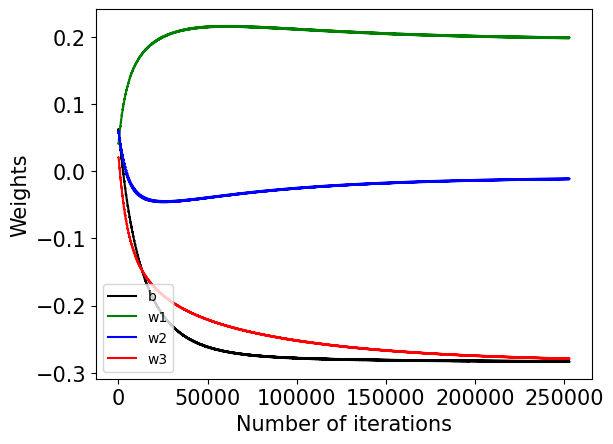

In [ ]:
# Program_17d.py: Boston Housing Data. Simple introduction to Neural Networks
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt("housing.txt")
rows, columns = data.shape
columns = 4  # Using 4 columns from the dataset in this case.
X , t = data[:, [5, 8, 12]] , data[:, 13]
ws1, ws2, ws3, ws4 = [], [], [], []
# Normalize the data.
xmean , xstd = X.mean(axis=0) , X.std(axis=0)
ones = np.array([np.ones(rows)])
X = (X - xmean * ones.T) / (xstd * ones.T)
X = np.c_[np.ones(rows), X]
tmean , tstd = (max(t) + min(t)) / 2 , (max(t) - min(t)) / 2
t = (t - tmean) / tstd
# Set random weights.
w = 0.1 * np.random.random(columns)
y1 = np.tanh(X.dot(w))
e1 = t - y1
mse = np.var(e1)
num_epochs , eta = 500 , 0.0001 # Learning rate
k = 1
for m in range(num_epochs):
    for n in range(rows):
        yk = np.tanh(X[n, :].dot(w))
        err = yk - t[n]
        g = X[n, :].T * ((1 - yk**2) * err) # Gradient vector.
        w = w - eta*g                       # Update weights.
        k += 1
        ws1.append([k, np.array(w[0]).tolist()])
        ws2.append([k, np.array(w[1]).tolist()])
        ws3.append([k, np.array(w[2]).tolist()])
        ws4.append([k, np.array(w[3]).tolist()])
ws1,ws2,ws3,ws4=np.array(ws1),np.array(ws2),np.array(ws3),np.array(ws4)
plt.plot(ws1[:, 0],ws1[:, 1],"k",markersize=0.1,label="b")
plt.plot(ws2[:, 0],ws2[:, 1],"g",markersize=0.1,label="w1")
plt.plot(ws3[:, 0],ws3[:, 1],"b",markersize=0.1,label="w2")
plt.plot(ws4[:, 0],ws4[:, 1],"r",markersize=0.1,label="w3")
plt.xlabel("Number of iterations", fontsize=15)
plt.ylabel("Weights", fontsize=15)
plt.tick_params(labelsize=15)
plt.legend()
plt.show()

# **KERAS and TensorFlow**

# TensorFlow for Linear Regression and an XOR Logic Gate.

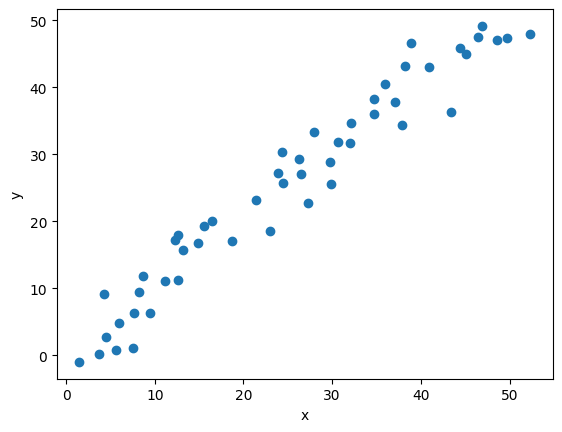

In [ ]:
# Simplest Artifical Nueral Network (Linear Regression)
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(205)
x_train = np.linspace(0 , 50 , 50) # 50 x-values
y_train = np.linspace(0 , 50 , 50) # 50 y-values
x_train += np.random.uniform(-4 , 4 , 50) # Adds noise
y_train += np.random.uniform(-4 , 4 , 50)
n = len(x_train)
plt.scatter(x_train , y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

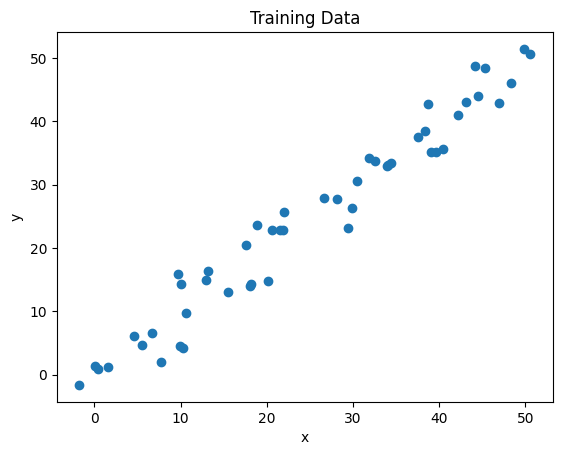

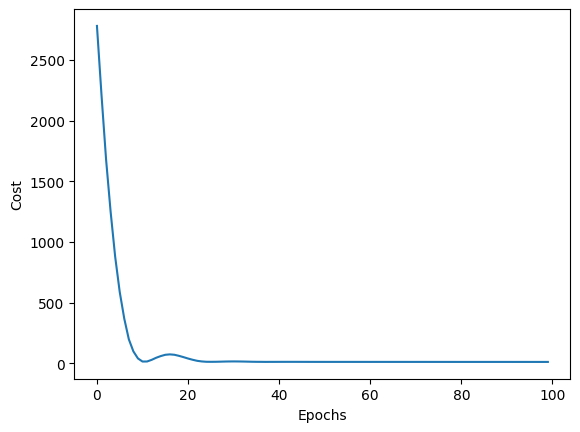

weight: [0.94900745] bias: [1.1868328]


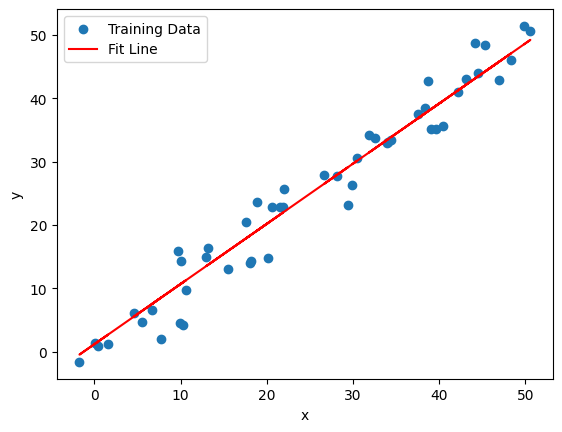

In [ ]:
# Program_18a.ipynb: Linear Regression with TensorFlow.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed(101)
x_train = np.linspace(0, 50, 50)
y_train = np.linspace(0, 50, 50)           # There will be 50 data points ranging from 0 to 50.
x_train += np.random.uniform(-4, 4, 50)    # Adding noise to the random linear data.
y_train += np.random.uniform(-4, 4, 50)
n = len(x_train)                           # Number of data points.
plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer0])
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(x_train, y_train, epochs=100, verbose=False)
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.plot(history.history['loss'])
plt.show()
weights = layer0.get_weights()
weight = weights[0][0]
bias = weights[1]
print('weight: {} bias: {}'.format(weight, bias))
y_learned = x_train * weight + bias
plt.scatter(x_train, y_train, label='Training Data')
plt.plot(x_train, y_learned, color='red', label='Fit Line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

1/1 [==============================] - 0s 146ms/step
[[0.]
 [1.]
 [1.]
 [0.]]
1/1 [==============================] - 0s 231ms/step - loss: 8.8701e-09 - accuracy: 1.0000
8.870095768997999e-09 1.0


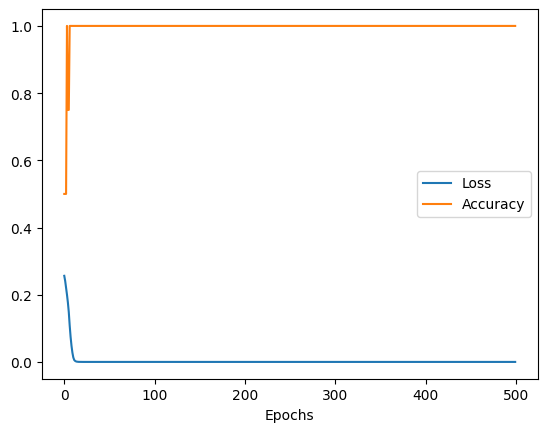

In [ ]:
# Program_18b.ipynb: TensorFlow program for XOR gate.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import sys

training_data = np.array([[0,0],[0, 1], [1, 0], [1, 1]], 'float32')
target_data = np.array([[0], [1], [1], [0]], 'float32')
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, activation = 'relu')) # 8 Nuerons in this layer
model.add(tf.keras.layers.Dense(8, activation = 'relu')) # 8 Nuerons in this layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) # 8 Nueron in this layer

model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1),\
              metrics=['accuracy'])
hist = model.fit(training_data, target_data, epochs = 500, verbose = 0)
print(model.predict(training_data).round())
val_loss, val_acc = model.evaluate(training_data, target_data)
print(val_loss, val_acc)
loss_curve = hist.history["loss"]
acc_curve = hist.history["accuracy"]
plt.plot(loss_curve, label='Loss')
plt.plot(acc_curve, label='Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

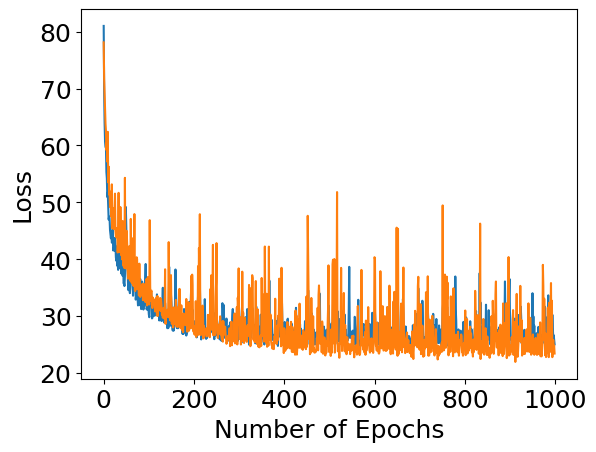

In [ ]:
# Program_18c.ipynb: TensorFlow programs for Boston housing data.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# Import the data through Keras.
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test)=boston_housing.load_data(path= \
"boston_housing.npz",test_split=0,seed=113)
# Model 1: One neuron, no overfitting.
model = keras.Sequential([keras.layers.Dense(1, input_dim=13, \
kernel_initializer="normal"),])
# Model 2: Overfitting due to too many neurons.
# model = keras.Sequential([
# keras.layers.Dense(10, input_dim=13, kernel_initializer="normal", \
# activation="relu"),
# keras.layers.Dense(1, input_dim=13, kernel_initializer="normal"),])
# Model 3: Overfitting due to too many layers and neurons.
# model = keras.Sequential([
# keras.layers.Dense(100, input_dim=13, kernel_initializer="normal", \
# activation="relu"),
# keras.layers.Dense(100, kernel_initializer="normal", \
# activation="relu"),
# keras.layers.Dense(1, input_dim=13, kernel_initializer="normal"),])
# Model 4: Validation split: 90% of data used to test.
# Change validation_split to 0.9 in hist.
# model = keras.Sequential([
# keras.layers.Dense(100, input_dim=13, kernel_initializer="normal", \
# activation="relu"),
# keras.layers.Dense(100, kernel_initializer="normal", \
# activation="relu"),
# keras.layers.Dense(1, input_dim=13, kernel_initializer="normal"),])
model.compile(loss="mean_squared_error", optimizer= \
tf.keras.optimizers.Adam(0.01))
hist=model.fit(x_train, y_train, epochs=1000, validation_split=0.2, \
verbose=0)
epochs = 1000
plt.rcParams["font.size"] = "18"
plt.plot(range(epochs), hist.history["loss"], range(epochs), \
hist.history["val_loss"])
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.show()

## **Recurrent Neural Networks**

Predicting Chaos and the Financial Markets


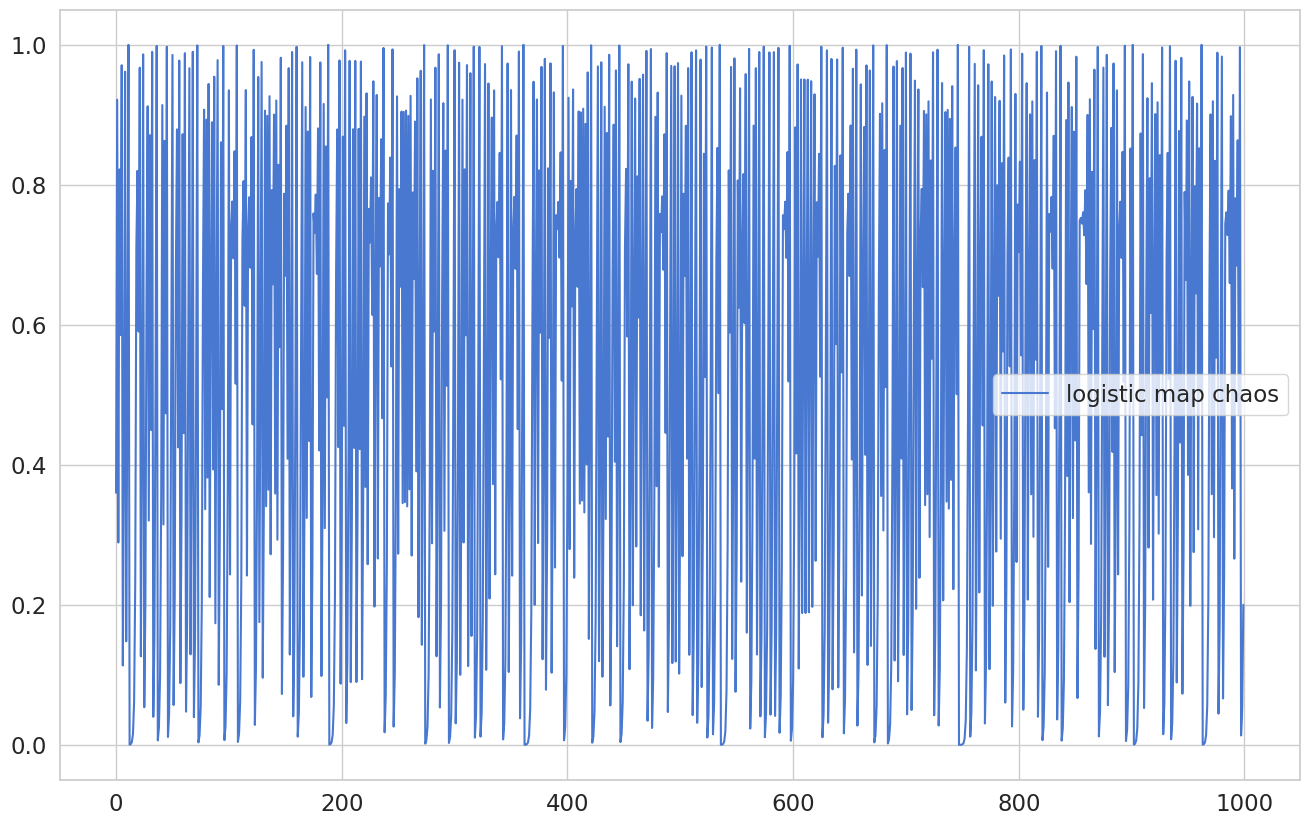

In [ ]:
# Long Short-Term Memory Time
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_formate = "retina"
sns.set(style = "whitegrid" , palette = "muted" , font_scale = 1.5)
rcParams["figure.figsize"] = 16 , 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
x = 0.1
chaos = []
for t in range(1000):
  x = 4 * x * (1 - x) # Chaotic logistic map
  chaos = np.append(chaos , x)
time = np.arange(0 , 100 , 0.1)
plt.plot(chaos , label = "logistic map chaos")
plt.legend()

In [ ]:
df = pd.DataFrame(dict(chaos=chaos),index=time,columns=["chaos"])
df.head()

,chaos
0.0,0.360000
0.1,0.921600
0.2,0.289014
0.3,0.821939
0.4,0.585421


In [ ]:
train_size = int(len(df) * 0.8) # Training data
test_size = len(df) - train_size # Testing data
train , test = df.iloc[0:train_size],df.iloc[train_size:len(df)] # iloc is index location
print(len(train) , len(test))

800 200


In [ ]:
def create_dataset(X , y , time_steps=1):
  Xs , ys = [], []
  for i in range(len(X) - time_steps):
      v = X.iloc[i:(i + time_steps)].values
      Xs.append(v)
      ys.append(y.iloc[i + time_steps])
  return np.array(Xs) , np.array(ys)

In [ ]:
time_steps = 10
X_train, y_train = create_dataset(train , train.chaos , time_steps)
X_test, y_test = create_dataset(test , test.chaos , time_steps)
print(X_train.shape , y_train.shape)

(790, 10, 1) (790,)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.Adam(0.001))
history = model.fit(X_train,y_train,epochs=30,batch_size=16,validation_split=0.1,verbose=1,shuffle=False)

Epoch 1/30
45/45 [==============================] - 4s 34ms/step - loss: 0.1494 - val_loss: 0.1278
Epoch 2/30
45/45 [==============================] - 1s 14ms/step - loss: 0.1286 - val_loss: 0.1261
Epoch 3/30
45/45 [==============================] - 0s 10ms/step - loss: 0.1263 - val_loss: 0.1251
Epoch 4/30
45/45 [==============================] - 0s 9ms/step - loss: 0.1249 - val_loss: 0.1252
Epoch 5/30
45/45 [==============================] - 0s 9ms/step - loss: 0.1244 - val_loss: 0.1254
Epoch 6/30
45/45 [==============================] - 0s 9ms/step - loss: 0.1238 - val_loss: 0.1250
Epoch 7/30
45/45 [==============================] - 0s 9ms/step - loss: 0.1231 - val_loss: 0.1247
Epoch 8/30
45/45 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1244
Epoch 9/30
45/45 [==============================] - 0s 9ms/step - loss: 0.1220 - val_loss: 0.1240
Epoch 10/30
45/45 [==============================] - 0s 9ms/step - loss: 0.1214 - val_loss: 0.1236
Epoch 11/30
45/

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=1, shuffle=False)

Epoch 1/30
45/45 [==============================] - 1s 18ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 2/30
45/45 [==============================] - 1s 11ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 3/30
45/45 [==============================] - 0s 9ms/step - loss: 0.0015 - val_loss: 0.0035
Epoch 4/30
45/45 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 0.0031
Epoch 5/30
45/45 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 6/30
45/45 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 7/30
45/45 [==============================] - 0s 9ms/step - loss: 9.5317e-04 - val_loss: 0.0018
Epoch 8/30
45/45 [==============================] - 0s 9ms/step - loss: 8.8070e-04 - val_loss: 0.0015
Epoch 9/30
45/45 [==============================] - 0s 9ms/step - loss: 8.1612e-04 - val_loss: 0.0013
Epoch 10/30
45/45 [==============================] - 0s 9ms/step - loss: 7.5995e-04 - val_loss: 0.0012
E

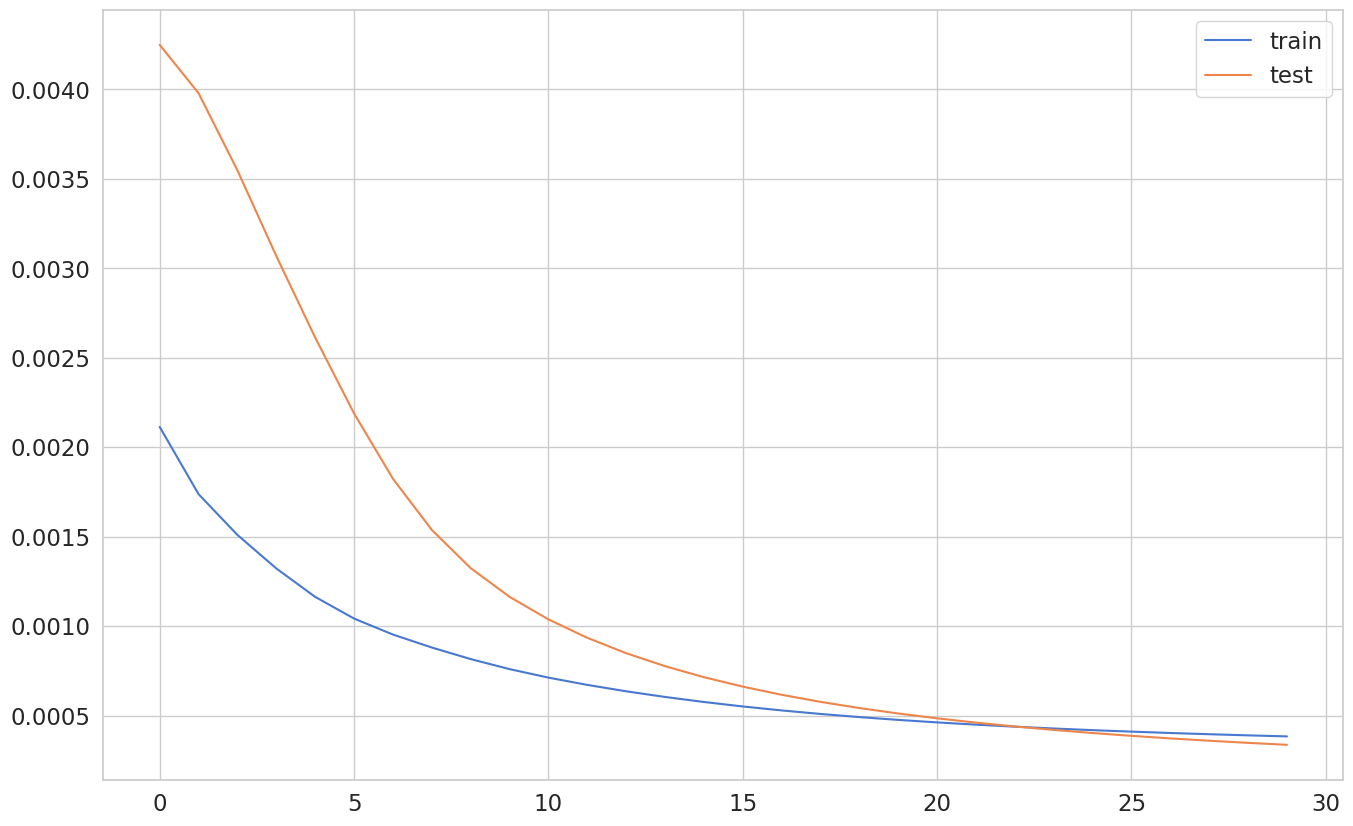

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

6/6 [==============================] - 0s 11ms/step


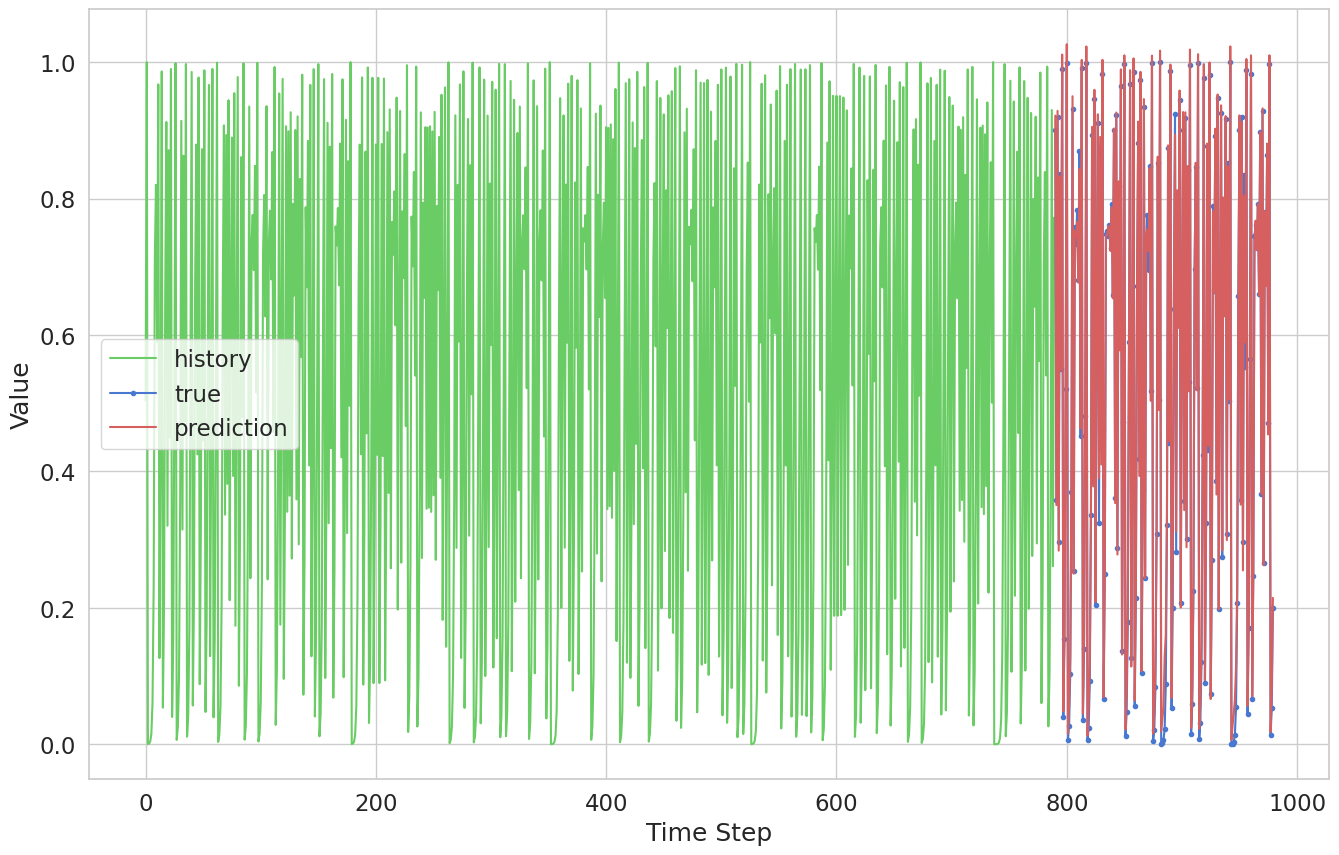

In [ ]:
y_pred = model.predict(X_test)
plt.plot(np.arange(0,len(y_train)) , y_train, "g" ,label="history") # 80% to train
plt.plot(np.arange(len(y_train),len(y_train)+len(y_test)),y_test,marker=".",label="true")
plt.plot(np.arange(len(y_train),len(y_train)+len(y_test)),y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

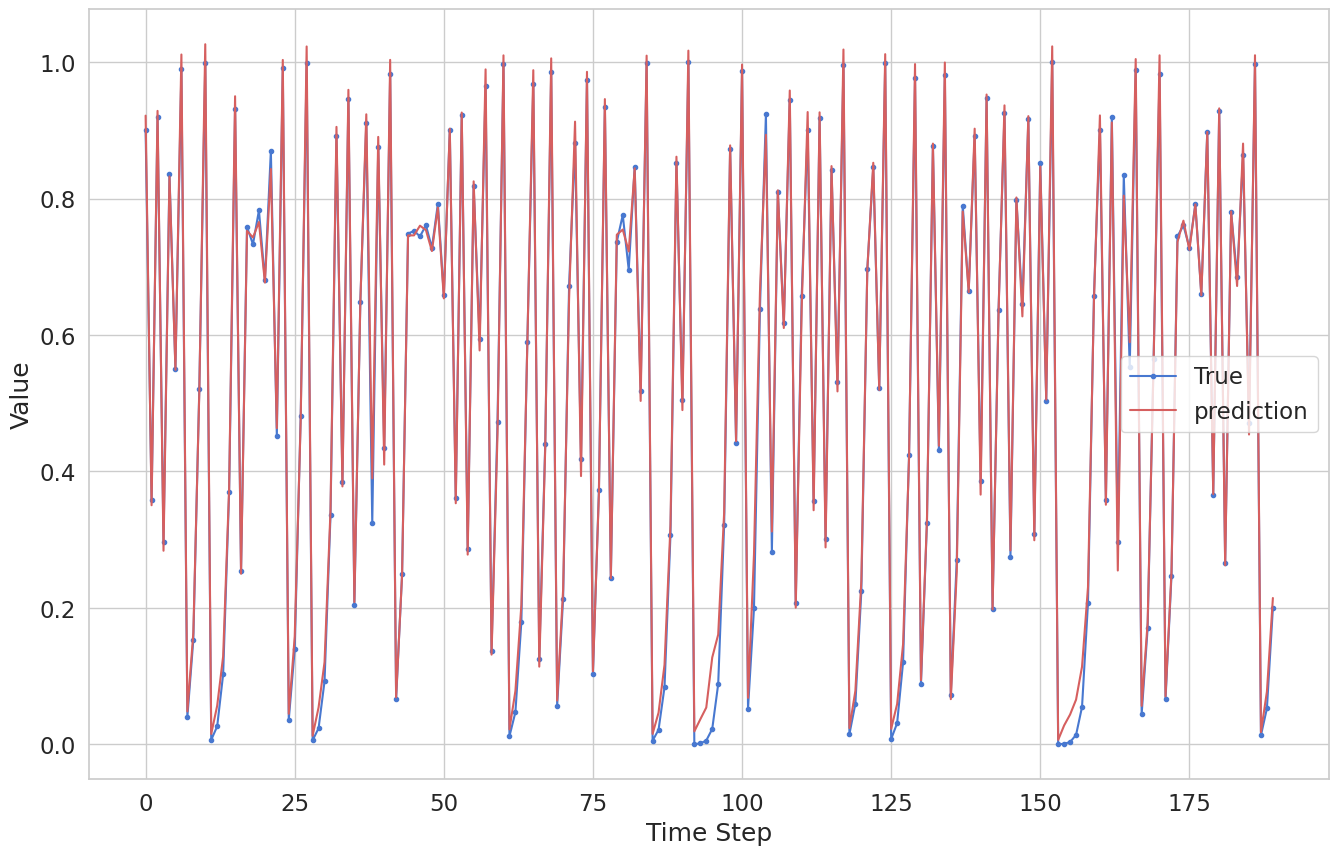

In [ ]:
plt.plot(y_test,marker=".",label='True')
plt.plot(y_pred,"r",label="prediction")
plt.ylabel("Value")
plt.xlabel("Time Step")
plt.legend()
plt.show()

## **Convolutional Neural Network (CNN)**

In [ ]:
# Convolve A with a filter K.
import numpy as np
A = np.array([[0,0,0,0,0,0,0,0,0],
              [0,0,0.9,0.8,0.8,0.9,0.3,0.1,0],
              [0,0.2,0.6,0.1,0,0,0.1,0.2,0],
              [0,0.3,0.4,0,0,0,0,0,0],
              [0,0,0,0.3,0.5,0.6,0.2,0,0],
              [0,0,0,0,0,0.1,0.5,0,0],
              [0,0,0,0,0,0.2,0.7,0.4,0],
              [0,0,0.1,0.6,0.3,0.4,0.3,0,0],
              [0,0,0,0,0,0,0,0,0]])

In [ ]:
# Filter
K = np.array([[0,-1,2,-1,0],
              [0,-1,2,-1,0],
              [0,-1,2,-1,0],
              [0,-1,2,-1,0],
              [0,-1,2,-1,0]])

In [ ]:
# Convolved array.
C = np.zeros([5 , 5])
for i in range(5):
  for j in range(5):
    C[j , i] = np.sum(A[j : 5 + j , i : 5 + i] * K)
print(C)

[[ 2.1 -0.8 -0.1  1.1 -0.6]
 [ 2.1 -0.8 -0.2  0.8  0.3]
 [ 1.1 -0.7 -0.3 -0.2  1.5]
 [-0.2  0.5 -0.6  0.1  1.7]
 [-0.7  0.9 -0.6  0.1  1.7]]


## **Convolutional Neural Network (MNIST Dataset)**

Dataset of 60,00 28x28 grayscale images of the 10 digits, aloong with a test of 10,000 images

11490434/11490434 [==============================] - 0s 0us/step
Dimensions of first image= (28, 28)


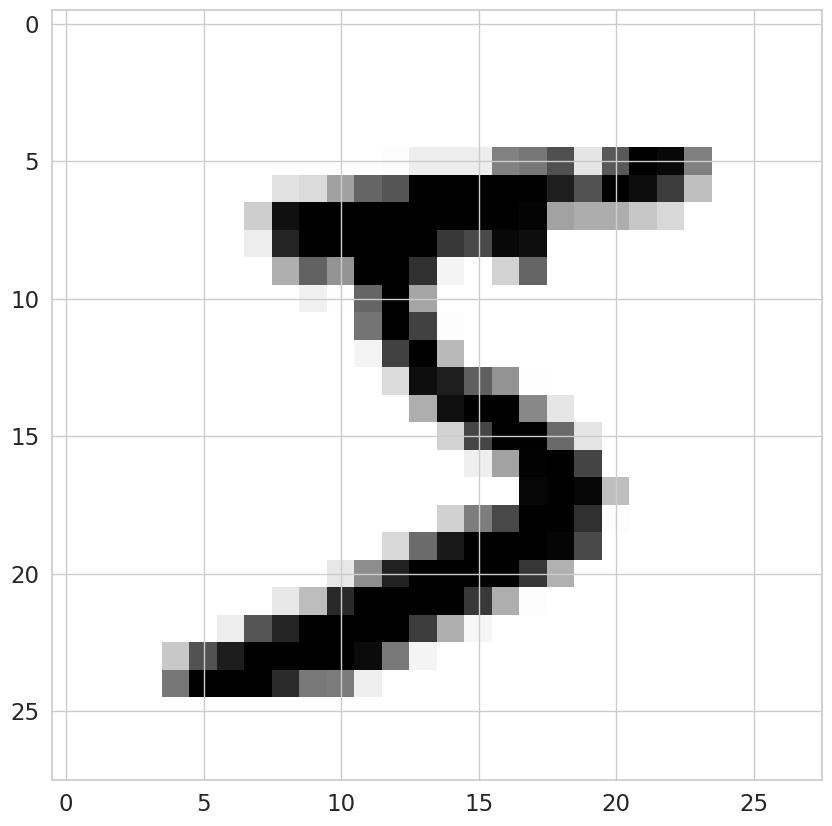

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()
print("Dimensions of first image=" , x_train[0].shape)
#print(x_train[0])
#plt.imshow(x_train[0])                      # Plots the colour image
plt.imshow(x_train[0], cmap = plt.cm.binary) # Plots a grey scale image

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

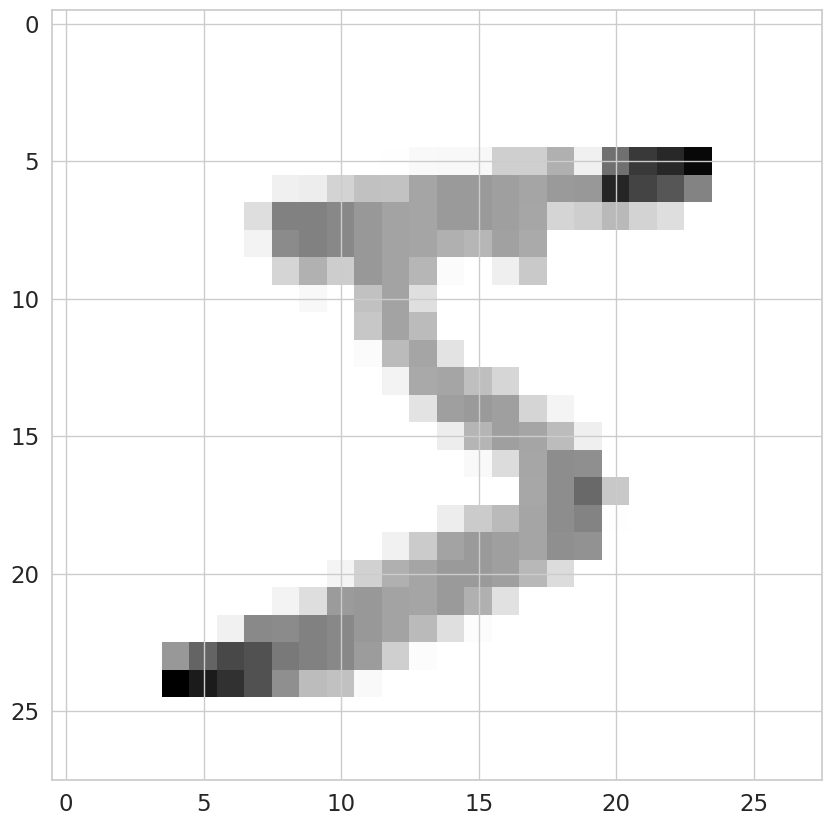

In [ ]:
# Nomralising the data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
print(x_train[0])
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # The input layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # The 1st hidden layer with Relu activation
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # The 2nd hidden layer with Relu activation
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # The number of classifications with softmax activation

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2635 - accuracy: 0.9220
Epoch 2/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1068 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0731 - accuracy: 0.9772


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0909 - accuracy: 0.9710
0.09085708856582642 0.9710000157356262


In [ ]:
predictions = model.predict([x_test])
print(predictions)

313/313 [==============================] - 1s 3ms/step
[[5.69026337e-09 3.07808648e-07 2.57614811e-05 ... 9.99968708e-01
  4.46270310e-09 4.07803128e-07]
 [3.66509134e-08 7.34046742e-04 9.99253154e-01 ... 1.17994583e-08
  4.59879317e-07 4.97800108e-12]
 [1.82026767e-07 9.99879301e-01 1.59404226e-05 ... 2.59039825e-05
  6.87277061e-05 3.17295331e-07]
 ...
 [7.70848999e-07 1.95229791e-06 1.27172996e-06 ... 4.00417863e-04
  1.63805507e-05 5.46436408e-04]
 [9.21606727e-07 2.52866812e-07 1.04065606e-07 ... 7.59673284e-08
  1.66355327e-04 3.76180331e-08]
 [1.03420454e-07 1.45262236e-09 3.43577113e-08 ... 2.82019044e-11
  5.96810645e-09 4.50540139e-09]]


1


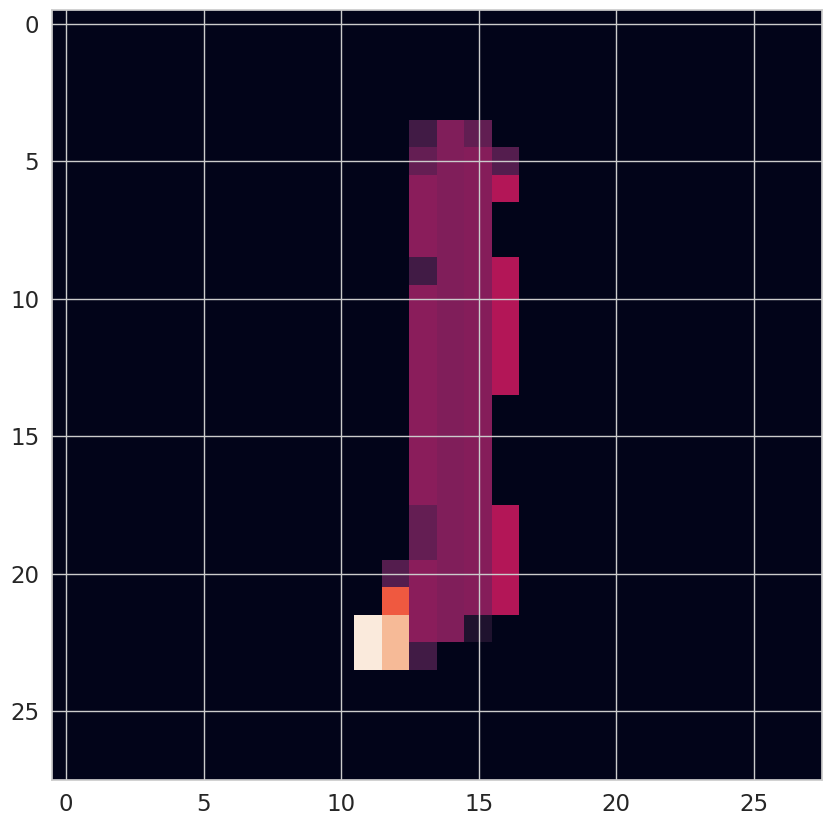

In [ ]:
import numpy as np
index = 14
print(np.argmax(predictions[index]))
plt.imshow(x_test[index])
plt.show()

## I can click on these links for further studies. Using TensorFlow to Write Shakespear or find out who has pnuemonia through data (medical applications)

https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/text_generation.ipynb

https://colab.research.google.com/notebooks/tpu.ipynb

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7327346/



## Python Files Author: (Dr Stephen Lynch FIMA SFHEA)

https://github.com/proflynch/CRC-Press/tree/main